# Mini Projekt 

- Fabian Oppermann
- Petruta-Denisa Biholari
- Philipp Hasel

https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

## 1. Datenbeschreibung

Die Daten stammen von Kaggle und beinhalten die meistgestreamten Songs auf Spotify im Jahr 2024. Die Daten sind in einer CSV-Datei gespeichert und enthalten folgende Spalten:

| Feld | Datentyp | Beschreibung |
|------|----------|-------------|
| Track | String | Name des Musikstücks |
| Album Name | String | Name des Albums, zu dem der Track gehört |
| Artist | String | Name des Künstlers oder der Band |
| Release Date | Date | Veröffentlichungsdatum des Tracks |
| ISRC | String | International Standard Recording Code (eindeutige Kennzeichnung) |
| All Time Rank | Integer | Gesamtranking des Songs auf allen Plattformen |
| Track Score | Float | Berechneter Popularitätswert des Tracks |
| Spotify Streams | Numeric | Anzahl der Streams auf Spotify |
| Spotify Playlist Count | Integer | Anzahl der Spotify-Playlists, die den Track enthalten |
| Spotify Playlist Reach | Numeric | Potenzielle Reichweite durch Spotify-Playlists |
| Spotify Popularity | Integer | Popularitätswert auf Spotify (0-100) |
| YouTube Views | Numeric | Anzahl der Aufrufe auf YouTube |
| YouTube Likes | Numeric | Anzahl der Likes auf YouTube |
| TikTok Posts | Numeric | Anzahl der TikTok-Beiträge mit dem Track |
| TikTok Likes | Numeric | Anzahl der Likes auf TikTok-Beiträgen mit dem Track |
| TikTok Views | Numeric | Anzahl der Aufrufe auf TikTok-Beiträgen mit dem Track |
| YouTube Playlist Reach | Numeric | Potenzielle Reichweite durch YouTube-Playlists |
| Apple Music Playlist Count | Integer | Anzahl der Apple Music-Playlists mit dem Track |
| AirPlay Spins | Numeric | Anzahl der Radiowiedergaben über AirPlay |
| SiriusXM Spins | Integer | Anzahl der Wiedergaben auf SiriusXM |
| Deezer Playlist Count | Integer | Anzahl der Deezer-Playlists mit dem Track |
| Deezer Playlist Reach | Numeric | Potenzielle Reichweite durch Deezer-Playlists |
| Amazon Playlist Count | Integer | Anzahl der Amazon Music-Playlists mit dem Track |
| Pandora Streams | Numeric | Anzahl der Streams auf Pandora |
| Pandora Track Stations | Numeric | Anzahl der Pandora-Stationen, die den Track spielen |
| Soundcloud Streams | Numeric | Anzahl der Streams auf Soundcloud |
| Shazam Counts | Numeric | Anzahl der Shazam-Erkennungen |
| TIDAL Popularity | Integer | Popularitätswert auf TIDAL |
| Explicit Track | Boolean | Kennzeichnung für explizite Inhalte (0=nein, 1=ja) |



In [1]:
%pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
import time
import numpy as np

# CSV laden
df = pd.read_csv("./Most Streamed Spotify Songs 2024.csv", encoding="latin1")

# Erste Stichprobe und Überblick
# print(df.sample(3)) # Display sample
# print(df.head()) # Display head
# df.info()
# print(df.describe(include='all')) # Display descriptive statistics

# Unique-Werte prüfen (z.B. für kategorische Features)
# for col in df.columns:
#     unique_vals = df[col].nunique()
#     if unique_vals < 20:
#         print(f"{col}: {df[col].unique()}")

## 2. Datenvisualisierung vor der Datenbereinigung

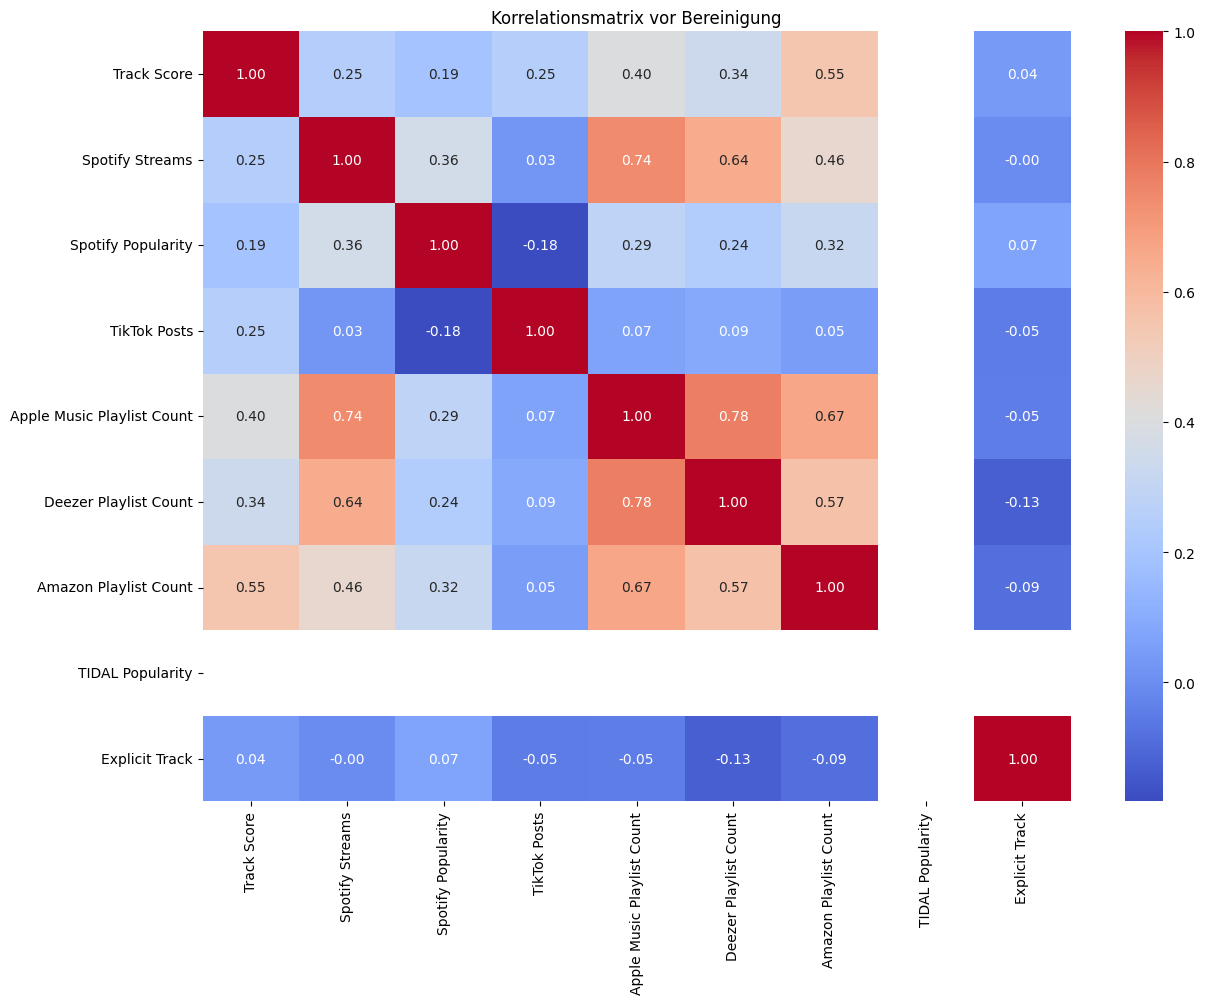

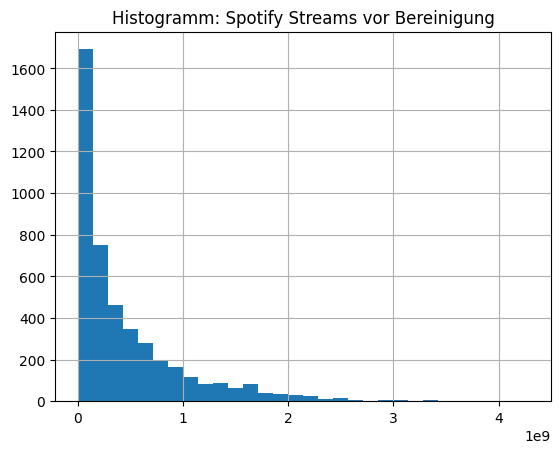

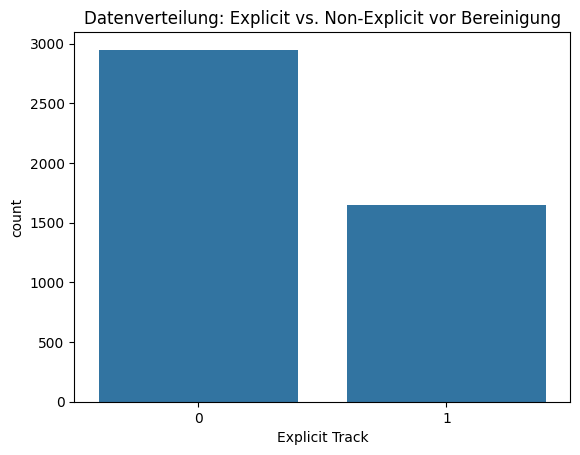

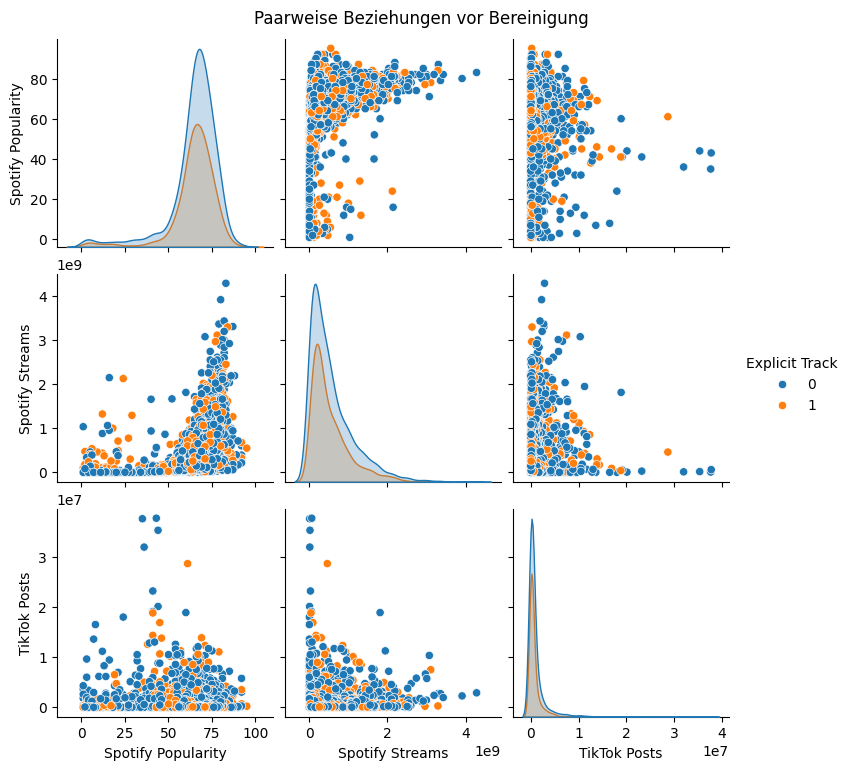

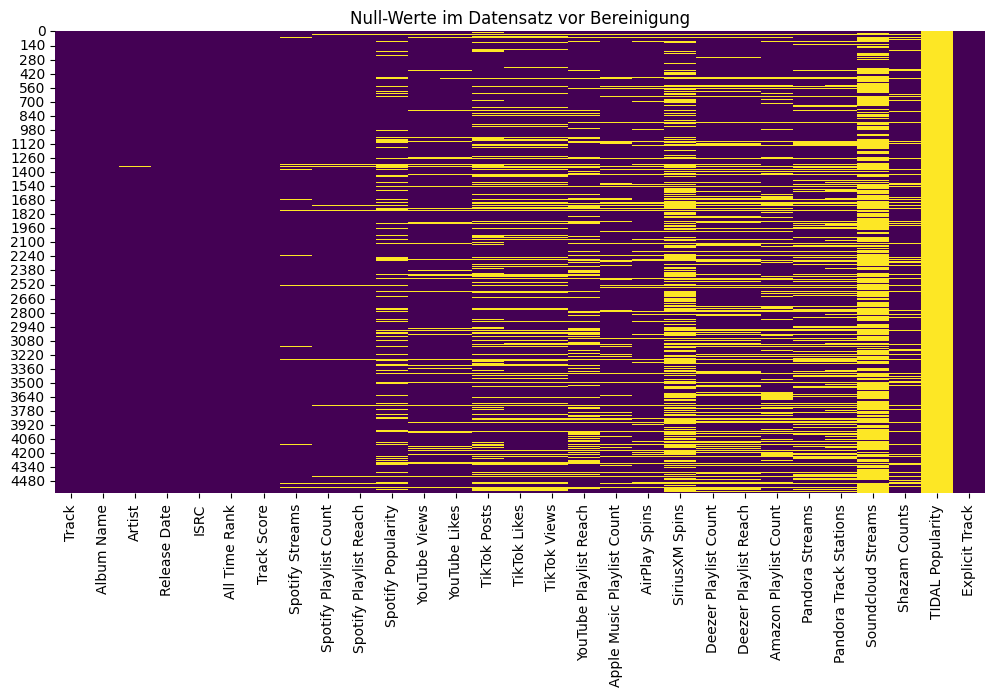

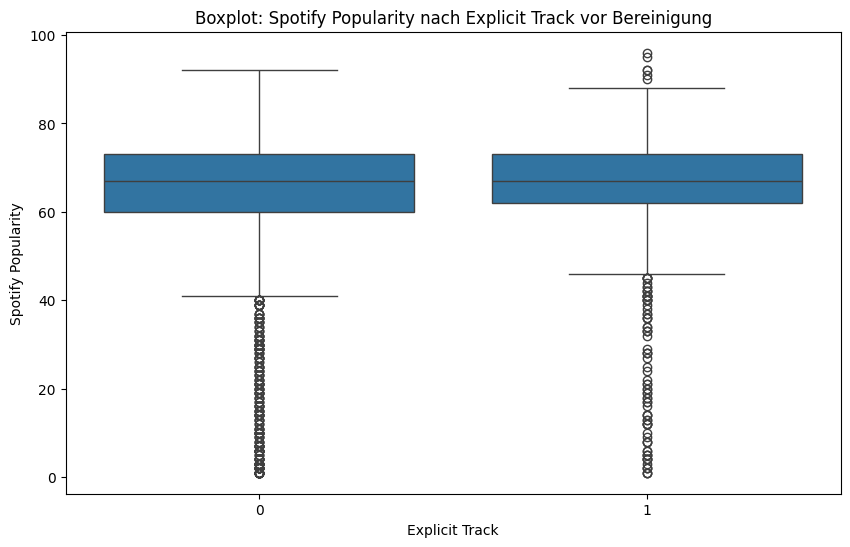

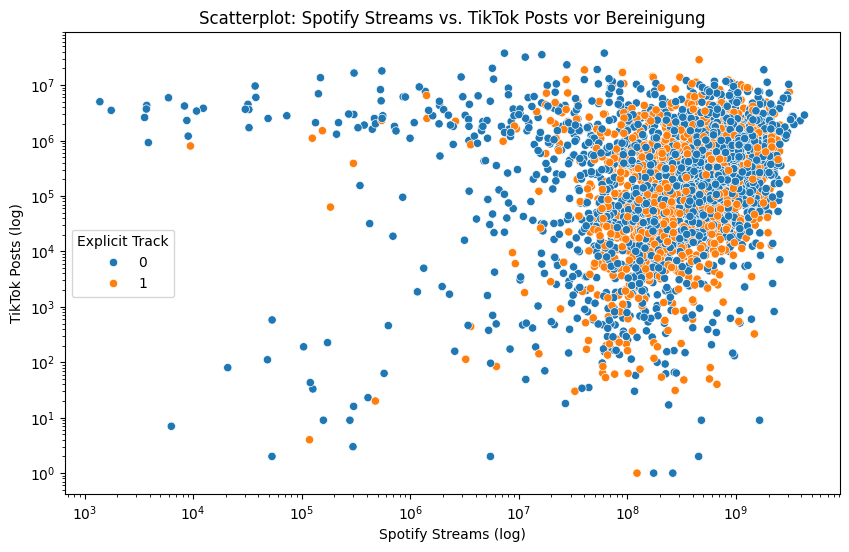

In [ ]:
# Hilfsfunktion zum Bereinigen von Zahlen mit Kommas
def to_numeric(series):
	return pd.to_numeric(series.astype(str).str.replace(',', ''), errors='coerce')

# Relevante Spalten bereinigen
df['Spotify Streams'] = to_numeric(df['Spotify Streams'])
df['TikTok Posts'] = to_numeric(df['TikTok Posts'])
df['Spotify Popularity'] = pd.to_numeric(df['Spotify Popularity'], errors='coerce')

# Korrelationen
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix vor Bereinigung") # Added "vor Bereinigung"
plt.show()

# Histogramme für ausgewählte Features
df['Spotify Streams'].hist(bins=30)
plt.title("Histogramm: Spotify Streams vor Bereinigung") # Added "vor Bereinigung"
plt.show()

# Datenverteilung Zielklasse
sns.countplot(x='Explicit Track', data=df)
plt.title("Datenverteilung: Explicit vs. Non-Explicit vor Bereinigung") # Added "vor Bereinigung"
plt.show()

# Paarweise Beziehungen
# Consider reducing the number of variables for pairplot if it's too dense or takes too long
pairplot_df = df[['Spotify Popularity', 'Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna()
if not pairplot_df.empty:
    sns.pairplot(pairplot_df, hue='Explicit Track')
    plt.suptitle("Paarweise Beziehungen vor Bereinigung", y=1.02) # Added suptitle for clarity
    plt.show()
else:
    print("DataFrame für Pairplot ist leer nach dropna(). Überprüfen Sie die Daten.")


# Nullwerte im Datensatz als Heatmap anzeigen
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null-Werte im Datensatz vor Bereinigung") # Added "vor Bereinigung"
plt.show()

# Boxplot für Spotify Popularity nach Explicit Track
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit Track', y='Spotify Popularity', data=df)
plt.title("Boxplot: Spotify Popularity nach Explicit Track vor Bereinigung") # Added "vor Bereinigung"
plt.show()

# Scatterplot für Spotify Streams vs. TikTok Posts
plt.figure(figsize=(10, 6))
# Ensure data for scatterplot is not all NaNs after to_numeric conversion
scatter_data = df[['Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna()
if not scatter_data.empty:
    sns.scatterplot(x='Spotify Streams', y='TikTok Posts', hue='Explicit Track', data=scatter_data)
    plt.title("Scatterplot: Spotify Streams vs. TikTok Posts vor Bereinigung") # Added "vor Bereinigung"
    plt.xscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
    plt.yscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
    plt.xlabel("Spotify Streams (log)")
    plt.ylabel("TikTok Posts (log)")
    plt.legend(title='Explicit Track')
    plt.show()
else:
    print("Daten für Scatterplot sind nach dropna() leer. Überprüfen Sie 'Spotify Streams' und 'TikTok Posts'.")


## 3. Datenberenigung

In [4]:
# Entfernen von Duplikaten
df = df.drop_duplicates()

# Fehlende Werte analysieren
missing = df.isnull().sum()
print("Fehlende Werte pro Spalte vor weiterer Bereinigung:")
print(missing[missing > 0])

# Zeilen mit fehlenden Werten in kritischen Spalten entfernen (kritisch für spätere Analyse/Modellierung)
df = df.dropna(subset=['Spotify Streams', 'TikTok Posts', 'Spotify Popularity'])

# TIDAL Popularity entfernen, da es viele fehlende Werte hat oder nicht im Fokus der Analyse steht.
df = df.drop(columns=["TIDAL Popularity"])

# Reduktion: Entferne identifizierende oder für die aktuelle Analyse irrelevante Text-Variablen
# 'Track', 'Album Name' sind spezifische Identifikatoren, 'ISRC' ist ein eindeutiger Code.
# Diese sind für allgemeine Popularitätsanalysen meist nicht direkt nutzbar.
df = df.drop(columns=['Track', 'Album Name', 'ISRC'])

# Datei speichern
df.to_csv("korr.csv", index=False)
print("\nBereinigte Daten in korr.csv gespeichert.")
print(f"Form des DataFrames nach Bereinigung: {df.shape}")

Fehlende Werte pro Spalte vor weiterer Bereinigung:
Artist                           5
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popularity              4598
dtype: int64

Bereinigte Daten in korr.csv gespeichert.
Form des DataFrames nach Bereinigung: (3186, 25)


## 4. Datenvisualisierung nach der Datenberenigung

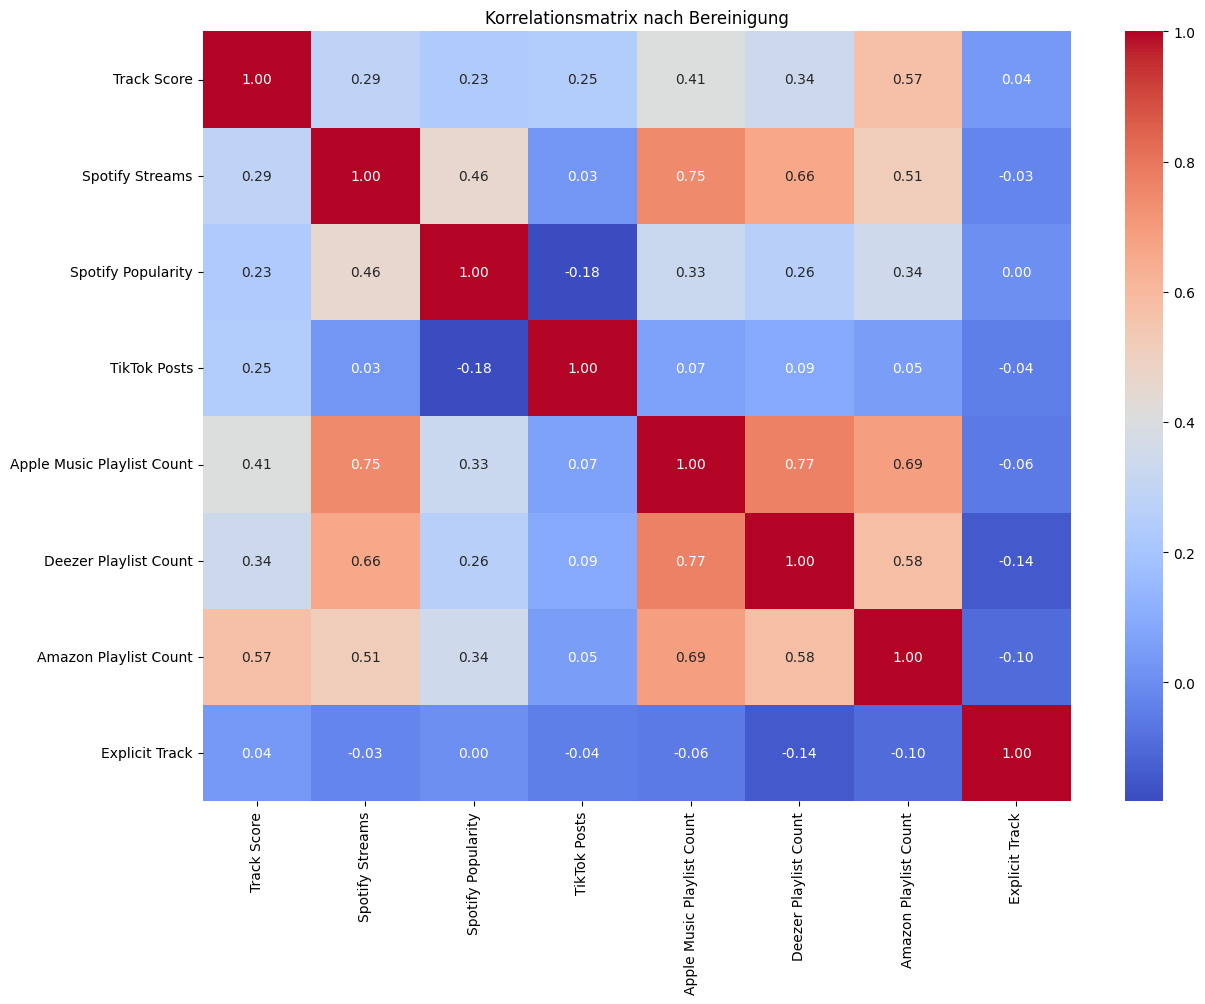

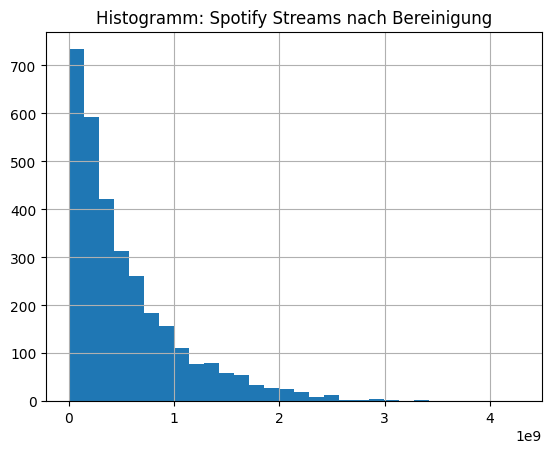

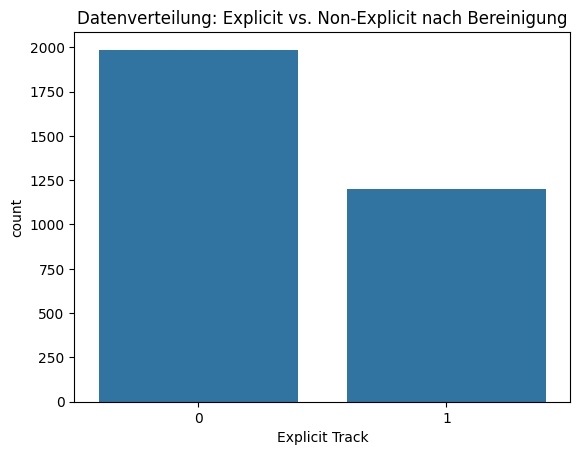

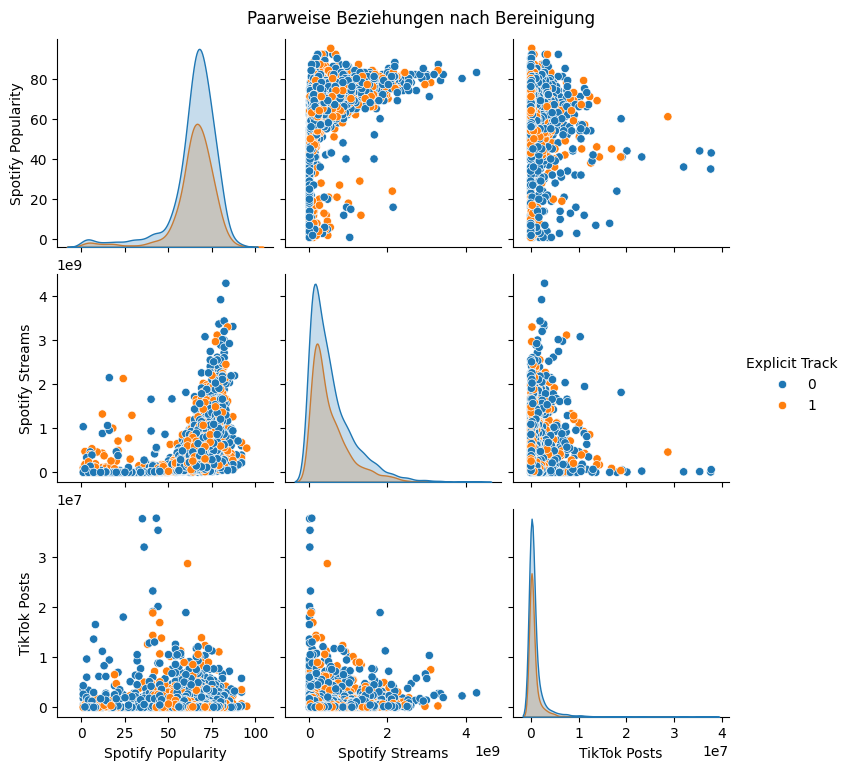

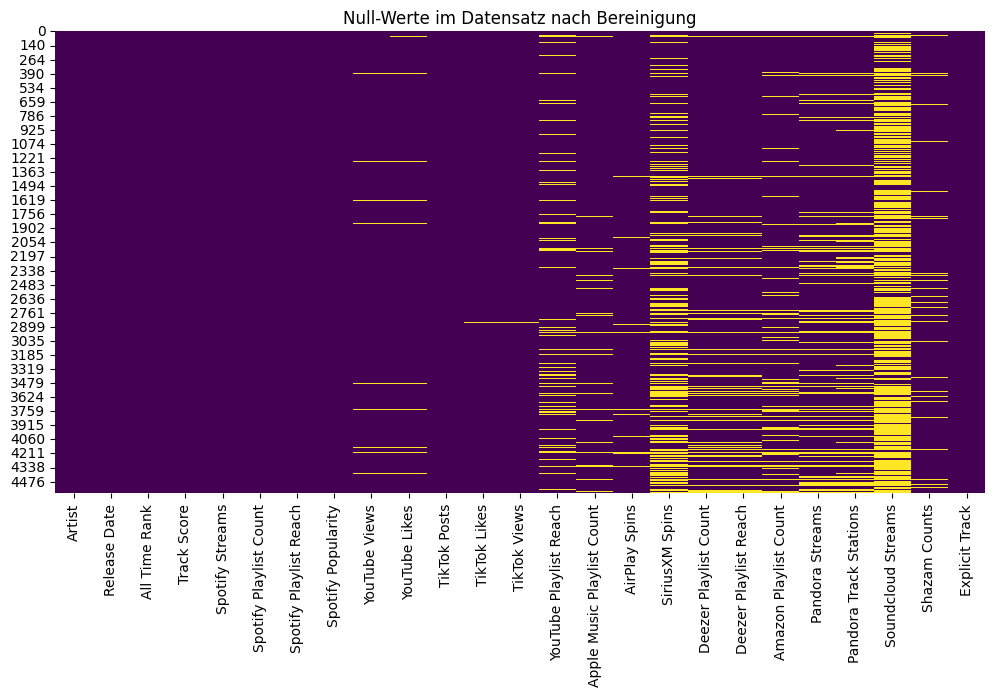

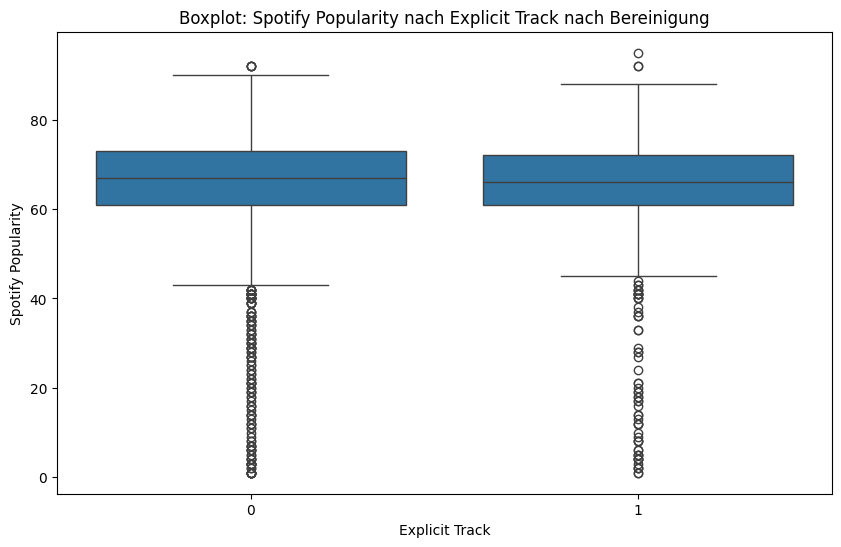

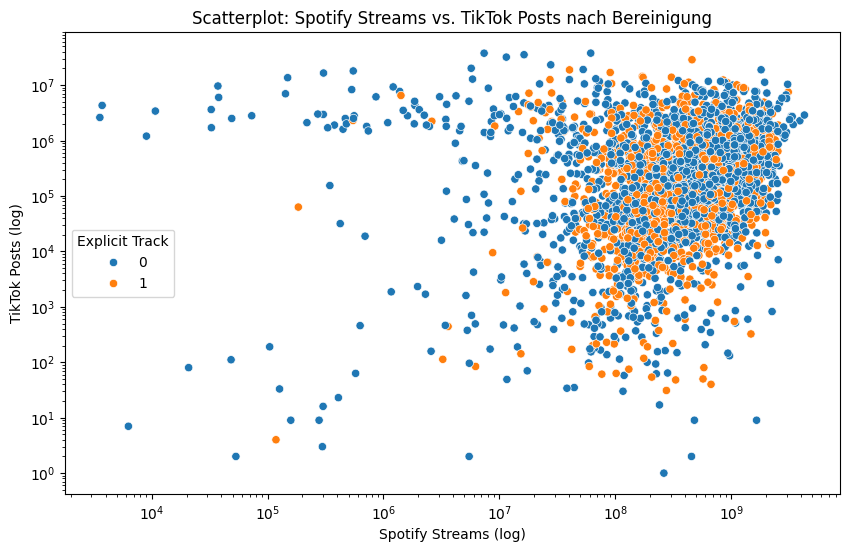

In [5]:
# Korrelationen
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix nach Bereinigung") # Added "nach Bereinigung"
plt.show()

# Histogramme für ausgewählte Features
df['Spotify Streams'].hist(bins=30)
plt.title("Histogramm: Spotify Streams nach Bereinigung") # Added "nach Bereinigung"
plt.show()

# Datenverteilung Zielklasse
sns.countplot(x='Explicit Track', data=df)
plt.title("Datenverteilung: Explicit vs. Non-Explicit nach Bereinigung") # Added "nach Bereinigung"
plt.show()

# Paarweise Beziehungen
# Consider reducing the number of variables for pairplot if it's too dense or takes too long
pairplot_df_cleaned = df[['Spotify Popularity', 'Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna()
if not pairplot_df_cleaned.empty:
    sns.pairplot(pairplot_df_cleaned, hue='Explicit Track')
    plt.suptitle("Paarweise Beziehungen nach Bereinigung", y=1.02) # Added suptitle
    plt.show()
else:
    print("DataFrame für Pairplot (nach Bereinigung) ist leer nach dropna().")

# Nullwerte im Datensatz als Heatmap anzeigen
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null-Werte im Datensatz nach Bereinigung") # Added "nach Bereinigung"
plt.show()

# Boxplot für Spotify Popularity nach Explicit Track
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit Track', y='Spotify Popularity', data=df)
plt.title("Boxplot: Spotify Popularity nach Explicit Track nach Bereinigung") # Added "nach Bereinigung"
plt.show()

# Scatterplot für Spotify Streams vs. TikTok Posts
plt.figure(figsize=(10, 6))
scatter_data_cleaned = df[['Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna()
if not scatter_data_cleaned.empty:
    sns.scatterplot(x='Spotify Streams', y='TikTok Posts', hue='Explicit Track', data=scatter_data_cleaned)
    plt.title("Scatterplot: Spotify Streams vs. TikTok Posts nach Bereinigung") # Added "nach Bereinigung"
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Spotify Streams (log)")
    plt.ylabel("TikTok Posts (log)")
    plt.legend(title='Explicit Track')
    plt.show()
else:
    print("Daten für Scatterplot (nach Bereinigung) sind nach dropna() leer.")


## Erkenntnisse:
- Die Korrelationen wurden durch die Reduktion realistischer.
- Außerdem sind die Visualisierungen nun klarer, da es weniger Ausreißer gibt.
- Außergewöhnlich ist aber, dass das Ungleichgewicht bei 'Explicit Track' nach der Bereinigung bestehen bleibt.

[Hier detailliertere Beobachtungen einfügen: Vergleichen Sie spezifische Änderungen in den Diagrammen vor und nach der Bereinigung. Zum Beispiel: Wie hat sich die Verteilung der 'Spotify Streams' im Histogramm verändert? Gab es auffällige Korrelationen, die verschwunden sind oder stärker wurden?]

## 5. Datenvorbereitung

## 6. Vergleich mit Klassifizierungsalgorithmen

### Für den Vergleich haben wir fünf verschiedene Klassifizierungsalgorithmen verwendet.
- Logistic Regression
- Support Vector Machine 
- Decision Tree
- Random Forest
- K-Nearest Neighbors 

### Hyperparameteroptimierung mit GridSearchCV:
Um die Algorithmen bestmöglich einzustellen, haben wir für jeden eine Hyperparameter-Optimierung mit GridSearchCV gemacht. Dabei wurde eine 5-fache Kreuzvalidierung (cv=5) verwendet. Außerdem haben wir die Laufzeit gemessen, damit das Tuning bei jedem Algorithmus unter 15 Minuten bleibt.

Spalte 'Artist' konnte nicht zu float konvertiert werden und bleibt Objekt.
Spalte 'Release Date' konnte nicht zu float konvertiert werden und bleibt Objekt.
Spalte 'All Time Rank' wurde zu float konvertiert.
Spalte 'Spotify Playlist Count' wurde zu float konvertiert.
Spalte 'Spotify Playlist Reach' wurde zu float konvertiert.
Spalte 'YouTube Views' wurde zu float konvertiert.
Spalte 'YouTube Likes' wurde zu float konvertiert.
Spalte 'TikTok Likes' wurde zu float konvertiert.
Spalte 'TikTok Views' wurde zu float konvertiert.
Spalte 'YouTube Playlist Reach' wurde zu float konvertiert.
Spalte 'AirPlay Spins' wurde zu float konvertiert.
Spalte 'SiriusXM Spins' wurde zu float konvertiert.
Spalte 'Deezer Playlist Reach' wurde zu float konvertiert.
Spalte 'Pandora Streams' wurde zu float konvertiert.
Spalte 'Pandora Track Stations' wurde zu float konvertiert.
Spalte 'Soundcloud Streams' wurde zu float konvertiert.
Spalte 'Shazam Counts' wurde zu float konvertiert.
Starte GridSearchCV für all

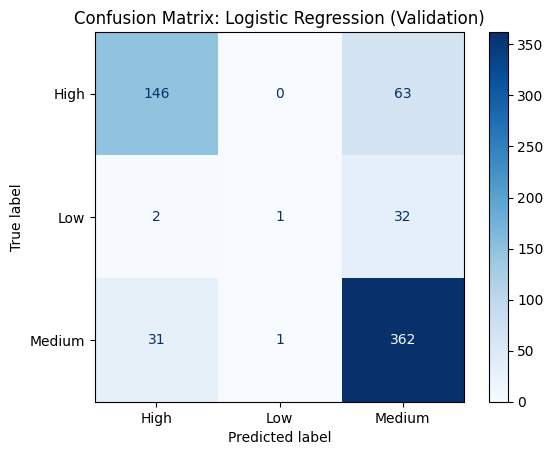

Confusion Matrix für SVM auf Validierungsdaten:


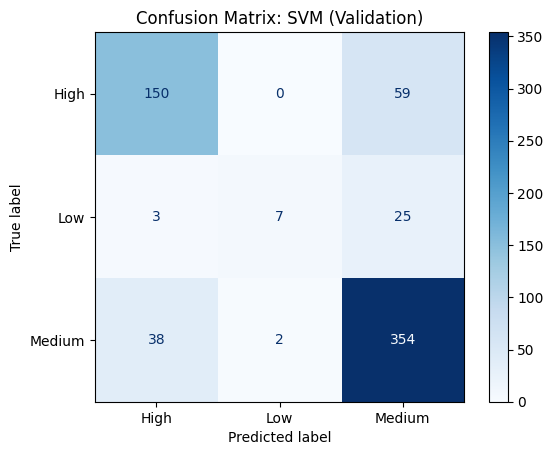

Confusion Matrix für Decision Tree auf Validierungsdaten:


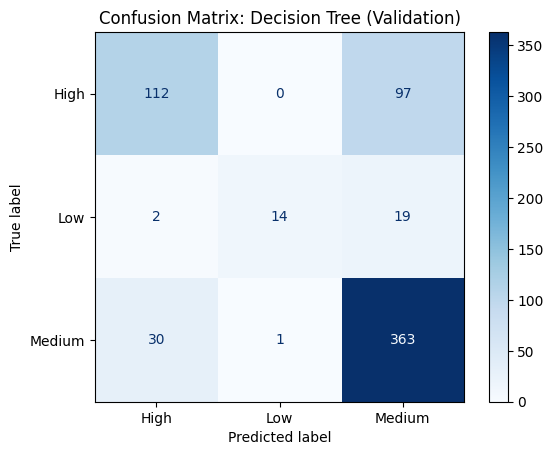

Confusion Matrix für Random Forest auf Validierungsdaten:


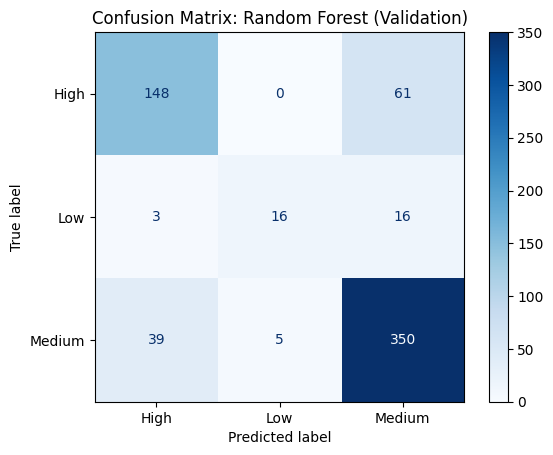

Confusion Matrix für KNN auf Validierungsdaten:


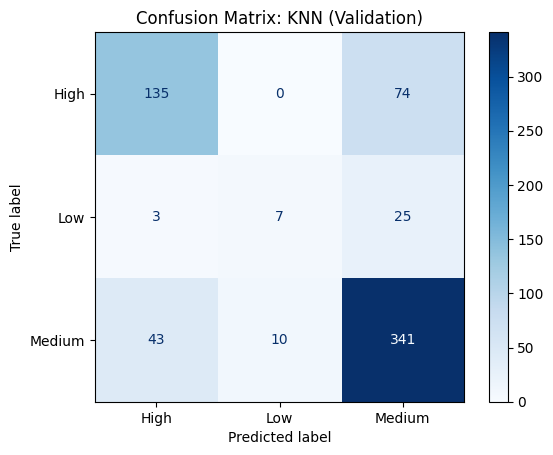

                     Accuracy  F1 (weighted)  Precision (weighted)  \
Random Forest        0.805643       0.800908              0.803162   
SVM                  0.800940       0.788660              0.799054   
Logistic Regression  0.797806       0.774893              0.783802   
Decision Tree        0.766458       0.752162              0.773992   
KNN                  0.757053       0.746563              0.745526   

                     Recall (weighted)       MCC  
Random Forest                 0.805643  0.604356  
SVM                           0.800940  0.588875  
Logistic Regression           0.797806  0.578195  
Decision Tree                 0.766458  0.514563  
KNN                           0.757053  0.498825  


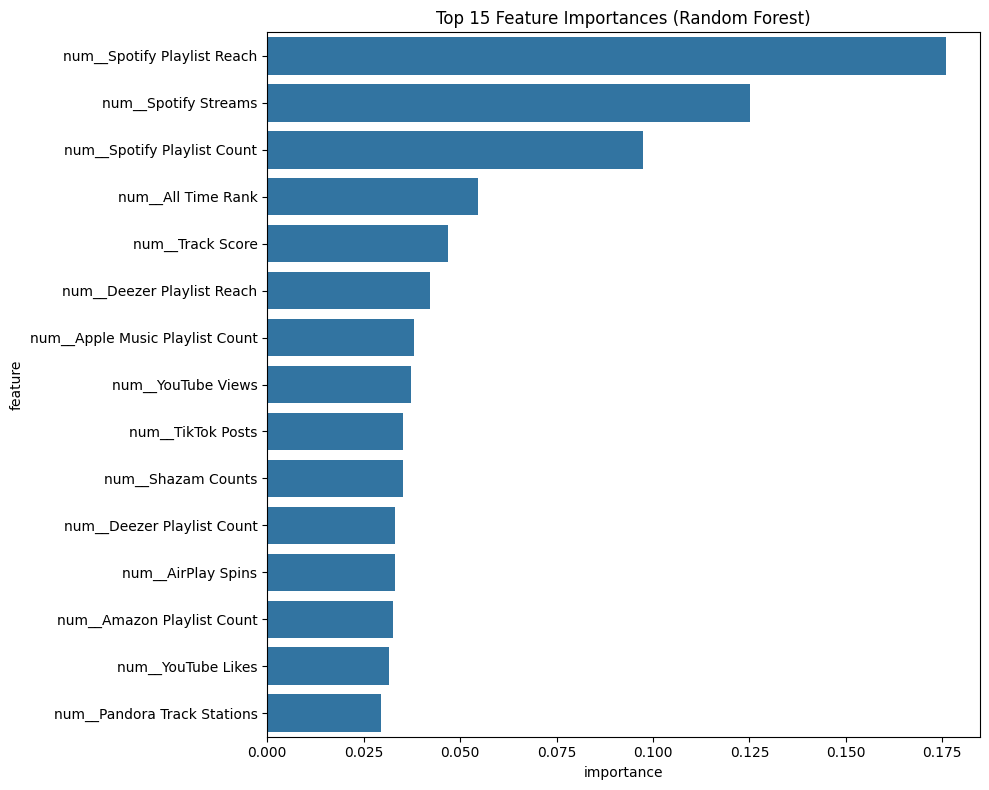

In [9]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("korr.csv")

# Numerische Spalten identifizieren, die als Objekt-Typ geladen wurden und Kommas enthalten könnten
for col in df.columns:
    if df[col].dtype == object:
        # Versuch, Kommas zu entfernen und in numerischen Typ umzuwandeln
        # Behält Spalten, die nicht numerisch sind (z.B. 'Artist', 'Release Date'), als Objekt
        try:
            # Teste, ob nach dem Ersetzen von Kommas eine Umwandlung in float möglich ist
            pd.to_numeric(df[col].str.replace(',', '', regex=False))
            df[col] = df[col].str.replace(',', '', regex=False).astype(float)
            print(f"Spalte '{col}' wurde zu float konvertiert.")
        except ValueError:
            # Wenn die Umwandlung fehlschlägt, ist es wahrscheinlich eine echte Zeichenkette
            print(f"Spalte '{col}' konnte nicht zu float konvertiert werden und bleibt Objekt.")
        except AttributeError: # Falls .str nicht verfügbar ist (z.B. wenn es bereits numerisch ist, aber als Objekt)
             try:
                df[col] = pd.to_numeric(df[col])
                print(f"Spalte '{col}' (ursprünglich Objekt) wurde zu numerisch konvertiert.")
             except ValueError:
                print(f"Spalte '{col}' (ursprünglich Objekt) konnte nicht zu numerisch konvertiert werden.")


# Zielvariable PopularityClass erstellen mit pd.cut (konsistent)
# Die Bins sollten die gesamte mögliche Range von Spotify Popularity abdecken (typischerweise 0-100)
df['PopularityClass'] = pd.cut(df['Spotify Popularity'], 
                                bins=[-1, 40, 70, 101], # Anpassung der oberen Grenze auf 101 (oder df['Spotify Popularity'].max() + 1)
                                labels=['Low', 'Medium', 'High'], 
                                right=True) # right=True bedeutet, dass der rechte Bin-Rand inklusive ist

# Überprüfen, ob NaNs in PopularityClass entstanden sind (z.B. wenn Werte außerhalb der Bins liegen)
if df['PopularityClass'].isnull().any():
    print("Warnung: Es gibt NaN-Werte in 'PopularityClass' nach pd.cut. Überprüfen Sie die Bins und Werte in 'Spotify Popularity'.")
    print(df[df['PopularityClass'].isnull()]['Spotify Popularity'])
    # Optionale Behandlung: df.dropna(subset=['PopularityClass'], inplace=True)

# Features und Ziel auswählen
# 'Artist' und 'Release Date' könnten potenziell als Features genutzt werden (z.B. nach Feature Engineering),
# aber hier werden sie als nicht-numerisch und nicht direkt verwendbar betrachtet.
# 'Explicit Track' wird hier entfernt, könnte aber ein Feature sein, wenn nicht Teil der Zieldefinition.
non_features = ['Artist', 'Release Date', 'Explicit Track', 'Spotify Popularity', 'PopularityClass']
X = df.drop(columns=non_features, errors='ignore') # errors='ignore' falls eine Spalte schon fehlt
y = df['PopularityClass'].dropna() # Sicherstellen, dass y keine NaNs hat, falls welche durch pd.cut entstanden
X = X.loc[y.index] # X und y synchron halten

# Kategoriale und numerische Features für den Preprocessor identifizieren
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include=['object', 'bool']).columns # Bool hier auch als cat behandelt für OneHotEncoding

# Labels in Zahlen umwandeln für y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Daten splitten
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Preprocessing Pipelines
# Numerische Pipeline: Fehlende Werte mit Median füllen (robuster gegen Ausreißer als Mittelwert) & skalieren
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # Geändert zu Median für Konsistenz und Robustheit
    ("scaler", StandardScaler())
])

# Kategoriale Pipeline: Fehlende Werte mit häufigstem Wert füllen & OneHot kodieren
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer, um Pipelines auf die richtigen Spalten anzuwenden
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Modelle und GridSearch-Parameter
models_config = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, solver='liblinear'), # solver für Konsistenz bei kleinen Datensets
        "params": {"classifier__C": [0.1, 1, 10]}
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {"classifier__C": [0.1, 1, 10], "classifier__kernel": ["linear", "rbf"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"classifier__max_depth": [3, 5, 10, None], "classifier__min_samples_split": [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"classifier__n_estimators": [50, 100], "classifier__max_depth": [5, 10, None]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"classifier__n_neighbors": [3, 5, 7], "classifier__weights": ["uniform", "distance"]}
    }
}

results_summary = {}

# GridSearch mit Zeitmessung
print("Starte GridSearchCV für alle Modelle...")
for name, config in models_config.items():
    # Komplette Pipeline mit Preprocessing und Klassifizierer
    pipeline_with_model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", config["model"])
    ])

    grid_search = GridSearchCV(pipeline_with_model, config["params"], cv=5, n_jobs=-1, scoring='accuracy')

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"--- {name} ---")
    print(f"Beste Parameter: {grid_search.best_params_}")
    print(f"Laufzeit: {round(end_time - start_time, 2)} Sekunden")
    print(f"Bestes CV-Score (Accuracy): {round(grid_search.best_score_, 4)}\n")

    results_summary[name] = {
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score_cv_accuracy": grid_search.best_score_,
        "fit_time_seconds": round(end_time - start_time, 2)
    }

# Modelle auf Validierungsdaten bewerten 
print("\nBewertung der besten Modelle auf Validierungsdaten:\n")
validation_scores = {}
for name, res in results_summary.items():
    best_model_pipeline = res["best_estimator"]
    y_pred_val = best_model_pipeline.predict(X_val)
    y_pred_proba_val = None
    if hasattr(best_model_pipeline, "predict_proba"):
        y_pred_proba_val = best_model_pipeline.predict_proba(X_val)


    validation_scores[name] = {
        "Accuracy": accuracy_score(y_val, y_pred_val),
        "F1 (weighted)": f1_score(y_val, y_pred_val, average='weighted', zero_division=0),
        "Precision (weighted)": precision_score(y_val, y_pred_val, average='weighted', zero_division=0),
        "Recall (weighted)": recall_score(y_val, y_pred_val, average='weighted', zero_division=0),
        "MCC": matthews_corrcoef(y_val, y_pred_val)
    }
    
    # Confusion Matrix anzeigen
    print(f"Confusion Matrix für {name} auf Validierungsdaten:")
    cm = confusion_matrix(y_val, y_pred_val, labels=le.transform(le.classes_))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name} (Validation)")
    plt.show()

score_df_validation = pd.DataFrame(validation_scores).T.sort_values(by="Accuracy", ascending=False)
print(score_df_validation)

# [Hier eine Markdown-Zelle einfügen, um die Ergebnisse der Modellbewertung zu diskutieren,
# das beste Modell zu identifizieren und mögliche nächste Schritte oder Einschränkungen zu erläutern.]
# [Für baumbasierte Modelle (Decision Tree, Random Forest) Feature Importance analysieren und plotten.]

# Beispiel für Feature Importance (Random Forest)
if "Random Forest" in results_summary:
    rf_pipeline = results_summary["Random Forest"]["best_estimator"]
    try:
        # Zugriff auf den RandomForestClassifier-Schritt in der Pipeline
        rf_model = rf_pipeline.named_steps['classifier']
        # Zugriff auf den Preprocessor-Schritt, um Feature-Namen zu erhalten
        preprocessor_step = rf_pipeline.named_steps['preprocessor']
        
        # Get feature names directly from the fitted ColumnTransformer
        # This is more robust than trying to get them from individual transformers within.
        transformed_feature_names = preprocessor_step.get_feature_names_out()
        
        importances = rf_model.feature_importances_
        
        # Ensure lengths match before creating DataFrame
        if len(transformed_feature_names) == len(importances):
            feature_importance_df = pd.DataFrame({'feature': transformed_feature_names, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15) # Top 15
            
            plt.figure(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df)
            plt.title('Top 15 Feature Importances (Random Forest)')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Konnte Feature Importance nicht plotten: Längenkonflikt zwischen Feature-Namen ({len(transformed_feature_names)}) und Importances ({len(importances)}).")
            print(f"Abgerufene Feature-Namen ({len(transformed_feature_names)}): {list(transformed_feature_names)}")
            # print(f"Importances ({len(importances)}): {importances}") # Kann sehr lang sein

    except Exception as e:
        print(f"Konnte Feature Importance für Random Forest nicht plotten: {e}")


###  Decision Surface Plot:

Top 2 Features für Decision Surface: ['Spotify Streams', 'Spotify Playlist Reach']


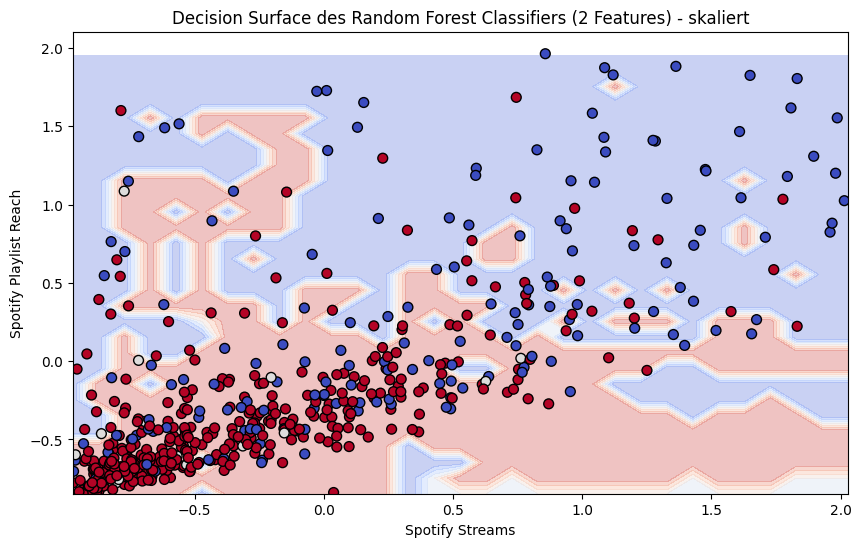

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Top 2 Features ermitteln
rf = results_summary["Random Forest"]["best_estimator"]
importances = rf.named_steps['classifier'].feature_importances_
feature_names = X.columns
top2_idx = np.argsort(importances)[-2:]
top2_features = feature_names[top2_idx]

print(f"Top 2 Features für Decision Surface: {top2_features.tolist()}")

# Daten auf 2 Features reduzieren
X_train_2d = X_train.iloc[:, top2_idx].values
X_val_2d = X_val.iloc[:, top2_idx].values

# Feature-Skalierung (StandardScaler)
scaler = StandardScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_val_2d_scaled = scaler.transform(X_val_2d)

# Random Forest mit 2 Features trainieren
model_2d = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model_2d.fit(X_train_2d_scaled, y_train)

# Bereich der Features (5. bis 95. Perzentil)
x_min, x_max = np.percentile(X_train_2d_scaled[:, 0], [5, 95])
y_min, y_max = np.percentile(X_train_2d_scaled[:, 1], [5, 95])

# Meshgrid mit Schrittweite 0.1, wegen Skalierung sind die Werte klein
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Vorhersagen auf Meshgrid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Validierungsdaten plotten
mask = (X_val_2d_scaled[:, 0] >= x_min) & (X_val_2d_scaled[:, 0] <= x_max) & \
       (X_val_2d_scaled[:, 1] >= y_min) & (X_val_2d_scaled[:, 1] <= y_max)

scatter = plt.scatter(
    X_val_2d_scaled[mask, 0], X_val_2d_scaled[mask, 1],
    c=y_val[mask], cmap=plt.cm.coolwarm, edgecolor='k', s=50
)

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("Decision Surface des Random Forest Classifiers (2 Features) - skaliert")
plt.show()


## Diskussion der Modelle

Im Rahmen der Klassifikation der Songs hinsichtlich des Merkmals „Explicit Track“ wurden verschiedene Modelle eingesetzt: Logistische Regression, Entscheidungsbaum, Random Forest, K-Nearest Neighbors (KNN) und Support Vector Classifier (SVC). Nachfolgend eine Reflexion der Eigenschaften und der beobachteten Ergebnisse:

### Logistische Regression
- Vorteile: Einfach, schnell, gut interpretierbar.
- Nachteile: Lineare Entscheidungsgrenzen – bei komplexeren Zusammenhängen kann die Leistung eingeschränkt sein.
- Beobachtung: Oft ein guter Basiswert, aber nicht das leistungsstärkste Modell.

### Decision Tree
- Vorteile: Leicht verständlich und interpretierbar.
- Nachteile: Hohe Overfitting-Gefahr bei tiefen Decision Trees.
- Beobachtung: Tendenz zur Überanpassung, wenn keine Begrenzungen gesetzt werden.

### Random Forest
- Vorteile: Sehr robust, geringeres Overfitting durch Aggregation vieler Bäume.
- Nachteile: Weniger interpretierbar als einzelne Bäume.
- Beobachtung: Häufig eines der besten Modelle bei gemischten Datentypen, auch hier gute Ergebnisse.

### K-Nearest Neighbors (KNN)
- Vorteile: Einfache Implementierung, keine Trainingsphase.
- Nachteile: Rechenaufwendig bei großen Datensätzen, sensitiv gegenüber Skalierung.
- Beobachtung: Abhängig von der Wahl von k und stark beeinflussbar durch nicht normalisierte Daten.

### Support Vector Machine (SVC)
- Vorteile: Besonders leistungsfähig bei gut trennbaren Daten, auch mit nichtlinearen Grenzen.
- Nachteile: Längere Trainingszeit, schwerer zu interpretieren.
- Beobachtung: Potenziell hohe Genauigkeit, aber abhängig von Parameterwahl und Datenvorverarbeitung.

### Endergebnis

Insgesamt zeigten sich Random Forest und SVC als die leistungsstärksten Modelle, während logistische Regression und Entscheidungsbaum mit ihrer guten Interpretierbarkeit punkten konnten. KNN bleibt ein interessantes Modell für explorative Zwecke, ist jedoch ohne genaue Parametereinstellung und Datenvorbereitung im Nachteil. Die Ergebnisse unterstreichen die Bedeutung der Datenvorverarbeitung sowie der Hyperparameteroptimierung, um das volle Potenzial jedes Modells auszuschöpfen.
